# Classification with White Wine

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(precision = 3, suppress = True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers

## Load Data with Pandas

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                'alcohol', 'quality']

raw_dataset = pd.read_csv(url, sep = ';')

In [4]:
dataset = raw_dataset.copy()
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Check if dataset contains unknown values**

In [6]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Split the dataset into a training set and a test set**

In [7]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

** Look at the overall statistics **

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3918.0,6.858754,0.855479,4.20000,6.300000,6.80000,7.3000,14.20000
volatile acidity,3918.0,0.278278,0.100173,0.08000,0.210000,0.26000,0.3200,1.00500
citric acid,3918.0,0.334722,0.122170,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,3918.0,6.380028,5.057262,0.60000,1.700000,5.20000,9.8500,65.80000
chlorides,3918.0,0.045709,0.022408,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,3918.0,35.172282,17.139453,2.00000,23.000000,34.00000,45.0000,289.00000
total sulfur dioxide,3918.0,137.688999,42.577736,9.00000,107.000000,133.50000,166.0000,440.00000
density,3918.0,0.994021,0.002987,0.98711,0.991753,0.99373,0.9961,1.03898
pH,3918.0,3.187412,0.151155,2.72000,3.080000,3.18000,3.2800,3.82000
sulphates,3918.0,0.489104,0.114159,0.23000,0.410000,0.47500,0.5500,1.08000


** Split the features from the labels **

In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('quality')
test_labels = test_features.pop('quality')

## Normalization Layer

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
fixed acidity,6.858754,0.855479
volatile acidity,0.278278,0.100173
citric acid,0.334722,0.122170
residual sugar,6.380028,5.057262
chlorides,0.045709,0.022408
free sulfur dioxide,35.172282,17.139453
total sulfur dioxide,137.688999,42.577736
density,0.994021,0.002987
pH,3.187412,0.151155
sulphates,0.489104,0.114159


In [11]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[  6.859   0.278   0.335   6.38    0.046  35.172 137.689   0.994   3.187
   0.489  10.517]


In [12]:
first = np.array(train_features[:1])

with np.printoptions(precision = 2, suppress = True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  7.3    0.32   0.35   1.4    0.05   8.   163.     0.99   3.24   0.42
   10.7 ]]

Normalized: [[ 0.52  0.42  0.13 -0.98  0.19 -1.59  0.59 -0.53  0.35 -0.61  0.15]]


** Define plotting functions **

In [13]:
def plot(history):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color=color)
    lns1 = ax1.plot(history.history['loss'], label = 'loss', color = color)
    lns2 = ax1.plot(history.history['val_loss'], label = 'val_loss', color = color, linestyle = 
    'dashed')
    ax1.tick_params(axis = 'y', labelcolor = color)

    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color = color)  
    lns3 = ax2.plot(history.history['accuracy'], label = 'accuracy', color = color)
    lns4 = ax2.plot(history.history['val_accuracy'], label = 'val_accuracy', color = color, linestyle
    = 'dashed')
    ax2.tick_params(axis = 'y', labelcolor = color)

    lns = lns1+lns2+lns3+lns4
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc = 'center right')

    fig.tight_layout() 
    plt.show()

In [14]:
def compare_plots(history_1, history_2, label_1, label_2):
    fig, ax = plt.subplots()

    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    lns1 = ax.plot(history_1.history['loss'], label = 'loss ' + str(label_1), color = 'g')
    lns2 = ax.plot(history_1.history['val_loss'], label = 'val_loss ' + str(label_1), color = 'g', 
    linestyle ='dashed')
    lns3 = ax.plot(history_2.history['loss'], label = 'loss ' + str(label_2), color = 'm')
    lns4 = ax.plot(history_2.history['val_loss'], label = 'val_loss ' +str(label_2), color = 'm', 
    linestyle ='dashed')

    plt.legend()
    fig.tight_layout() 
    plt.show()

## Build and Compile Model

** Add early stopping callback to avoid long unnecessary training times **

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50, restore_best_weights = True)

In [16]:
model_results = {}

### Small Model

In [17]:
def build_and_compile_small_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(16, activation = 'relu'),
      layers.Dense(11, activation = 'softmax')
  ])

  model.compile(loss = SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])
  return model

In [18]:
small_model = build_and_compile_small_model()
small_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                187       
Total params: 402
Trainable params: 379
Non-trainable params: 23
_________________________________________________________________


In [19]:
%%time
history_small = small_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 1000, callbacks = [callback])

CPU times: user 23 s, sys: 3.15 s, total: 26.2 s
Wall time: 17 s


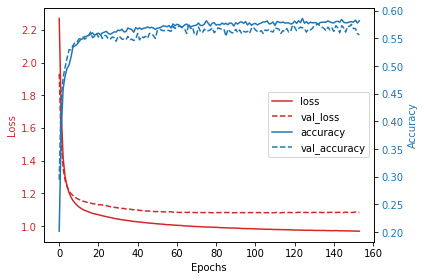

In [20]:
plot(history_small)

In [21]:
model_results['small_model'] = small_model.evaluate(test_features, test_labels)

31/31 [==============================] - 0s 3ms/step - loss: 1.0270 - accuracy: 0.5520


### Medium Model

In [22]:
def build_and_compile_medium_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(16, activation = 'relu'),
      layers.Dense(16, activation = 'relu'),
      layers.Dense(11, activation = 'softmax')
  ])

  model.compile(loss = SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])
  return model

In [23]:
medium_model = build_and_compile_medium_model()
medium_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                187       
Total params: 674
Trainable params: 651
Non-trainable params: 23
_________________________________________________________________


In [24]:
%%time
history_medium = medium_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 1000, callbacks = [callback])

CPU times: user 22.5 s, sys: 2.84 s, total: 25.3 s
Wall time: 17.8 s


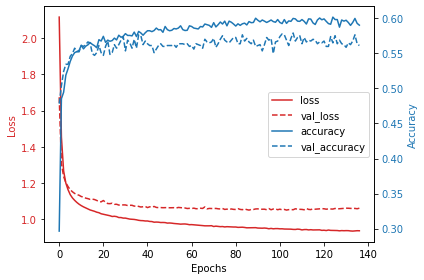

In [25]:
plot(history_medium)

In [26]:
model_results['medium_model'] = medium_model.evaluate(test_features, test_labels)

31/31 [==============================] - 0s 1ms/step - loss: 1.0464 - accuracy: 0.5367


### Large Model

In [27]:
def build_and_compile_large_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation = 'relu'),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(11, activation = 'softmax')
  ])

  model.compile(loss = SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])
  return model

In [28]:
large_model = build_and_compile_large_model()
large_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 11)                715       
Total params: 5,666
Trainable params: 5,643
Non-trainable params: 23
_________________________________________________________________


In [29]:
%%time
history_large = large_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 1000, callbacks = [callback])

CPU times: user 15.6 s, sys: 2.43 s, total: 18.1 s
Wall time: 11 s


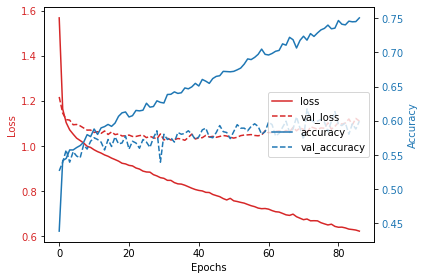

In [30]:
plot(history_large)

In [31]:
model_results['large_model'] = large_model.evaluate(test_features, test_labels)

31/31 [==============================] - 0s 5ms/step - loss: 1.0362 - accuracy: 0.5622


### L2 Regularization

In [32]:
def build_and_compile_l2_large_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)),
      layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)),
      layers.Dense(11, activation = 'softmax')
  ])

  model.compile(loss = SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])
  return model

In [33]:
l2_large_model = build_and_compile_l2_large_model()
l2_large_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 11)                715       
Total params: 5,666
Trainable params: 5,643
Non-trainable params: 23
_________________________________________________________________


In [34]:
%%time
history_l2_large = l2_large_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 1000, callbacks = [callback])

CPU times: user 28.4 s, sys: 4.38 s, total: 32.7 s
Wall time: 20.5 s


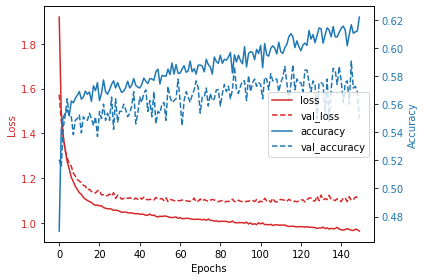

In [35]:
plot(history_l2_large)

In [36]:
model_results['l2_large_model'] = l2_large_model.evaluate(test_features, test_labels)

31/31 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.5816


### Dropout Regularization

In [37]:
def build_and_compile_dropout_large_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation = 'relu'),
      layers.Dropout(0.5),
      layers.Dense(64, activation = 'relu'),
      layers.Dropout(0.5),
      layers.Dense(11, activation = 'softmax')
  ])

  model.compile(loss = SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])
  return model

In [38]:
dropout_large_model = build_and_compile_dropout_large_model()
dropout_large_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_11 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 11)                715       
Total params: 5,666
Trainable params: 5,643
Non-trainable params: 23
___________________________________________________

In [39]:
%%time
history_dropout_large = dropout_large_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 1000, callbacks = [callback])

CPU times: user 44 s, sys: 7.01 s, total: 51 s
Wall time: 31.1 s


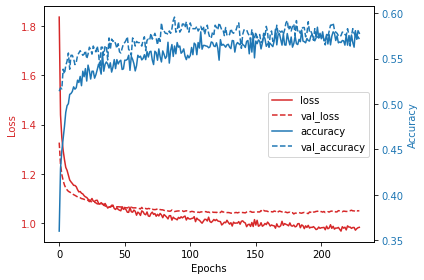

In [40]:
plot(history_dropout_large)

In [41]:
model_results['dropout_large_model'] = dropout_large_model.evaluate(test_features, test_labels)

31/31 [==============================] - 0s 3ms/step - loss: 0.9979 - accuracy: 0.5806


### L2 and Dropout Regularization Together

In [42]:
def build_and_compile_l2_and_dropout_large_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.005)),
      layers.Dropout(0.5),
      layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.005)),
      layers.Dropout(0.5),
      layers.Dense(11, activation = 'softmax')
  ])

  model.compile(loss = SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])
  return model

In [43]:
l2_and_dropout_large_model = build_and_compile_l2_and_dropout_large_model()
l2_and_dropout_large_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_14 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 11)                715       
Total params: 5,666
Trainable params: 5,643
Non-trainable params: 23
___________________________________________________

In [44]:
%%time
history_l2_and_dropout_large = l2_and_dropout_large_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 1000, callbacks = [callback])

CPU times: user 56.3 s, sys: 9.52 s, total: 1min 5s
Wall time: 37 s


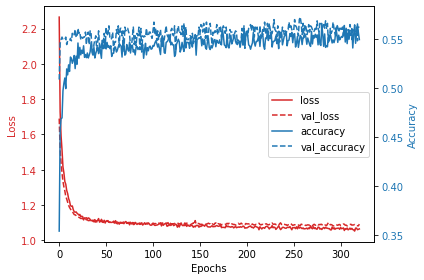

In [45]:
plot(history_l2_and_dropout_large)

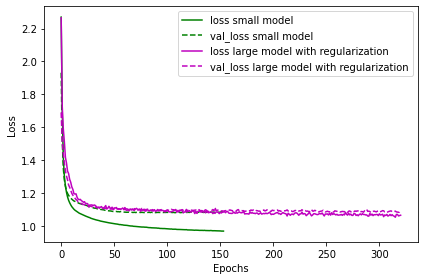

In [46]:
compare_plots(history_small, history_l2_and_dropout_large, 'small model', 'large model with regularization')

In [47]:
model_results['l2_and_dropout_large_model'] = l2_and_dropout_large_model.evaluate(test_features, test_labels)

31/31 [==============================] - 0s 1ms/step - loss: 1.0618 - accuracy: 0.5643


In [48]:
pd.DataFrame(model_results, index = ['Loss', 'Accuracy']).T

,Loss,Accuracy
small_model,1.026953,0.552041
medium_model,1.046354,0.536735
large_model,1.036185,0.562245
l2_large_model,1.060575,0.581633
dropout_large_model,0.997893,0.580612
l2_and_dropout_large_model,1.061802,0.564286
